In [1]:
using CUDA

include("vgg.jl")
include("layers.jl")
include("helpers.jl")
include("dataset.jl")
include("ssd4.jl")
include("utilities.jl")
include("train.jl")
include("transformations.jl")
include("config.jl")
using Dates


In [2]:
#device_reset!()

In [3]:
batch_size = 8
trainval_VOC2012_dataset = PascalVOC(trainval_VOC2012, annotation_path_train_VOC2012
    , images_path_train_VOC2012,"TRAIN",dtype = atype, batchsize =batch_size)


trainval_VOC2007_dataset = PascalVOC(trainval_VOC2007, annotation_path_trainval_VOC2007,
    images_path_trainval_VOC2007,"TRAIN",dtype = atype, batchsize =batch_size)

test_VOC2007_dateset = PascalVOC(test_VOC2007, annotation_path_test_VOC2007, images_path_test_VOC2007,
    "TEST", dtype=atype,batchsize=batch_size)
trainval_VOC2012_dataset = PascalVOC(trainval_VOC2012, annotation_path_train_VOC2012
    , images_path_train_VOC2012,"TRAIN",dtype = atype, batchsize =batch_size)

PascalVOC(["2008_000002", "2008_000003", "2008_000007", "2008_000008", "2008_000009", "2008_000015", "2008_000016", "2008_000019", "2008_000021", "2008_000023"  …  "2011_003256", "2011_003259", "2011_003260", "2011_003261", "2011_003262", "2011_003269", "2011_003271", "2011_003274", "2011_003275", "2011_003276"], 8, false, 11540, true, "TRAIN", "/datasets/pascal_voc2012/VOCdevkit/VOC2012/Annotations", "/datasets/pascal_voc2012/VOCdevkit/VOC2012/JPEGImages", KnetArray{Float32,N} where N, false, Dict{Any,Any}("2009_002806" => "/datasets/pascal_voc2012/VOCdevkit/VOC2012/Annotations/2009_002806.xml","2009_004085" => "/datasets/pascal_voc2012/VOCdevkit/VOC2012/Annotations/2009_004085.xml","2008_006280" => "/datasets/pascal_voc2012/VOCdevkit/VOC2012/Annotations/2008_006280.xml","2009_004518" => "/datasets/pascal_voc2012/VOCdevkit/VOC2012/Annotations/2009_004518.xml","2008_004783" => "/datasets/pascal_voc2012/VOCdevkit/VOC2012/Annotations/2008_004783.xml","2008_002728" => "/datasets/pascal_vo

In [4]:
function initopt!(model::SSD300, startLr = 1e-3,gclip = 0)
    for par in params(model)
        # Authors initialzied learning rates of bias 2x of weights learning rate
        if size(par)[1:2] == (1,1) && size(par)[end] == 1 #bias
            par.opt = Momentum(;lr=2*startLr, gclip=0, gamma = 0.9)
        else
            par.opt = Momentum(;lr=startLr, gclip=0,gamma = 0.9)
        end
    end
end
   
function currentTime()
    dt = now()
    return Dates.format(dt, "yyyy-mm-dd_HH:MM:SS")
end
function lrdecay!(model::SSD300, decay = 0.1)
    for param in params(model)
        param.opt.lr = param.opt.lr*decay
    end
end



lrdecay! (generic function with 2 methods)

In [5]:
(x,bounding_boxes,labels,_) = first(test_VOC2007_dateset);

In [6]:
ssd300 = SSD300(pretrained=false)

Only New Pretrained VGG16 constructor is called


SSD300(VGG16(Chain(Conv[Conv(P(KnetArray{Float32,4}(3,3,3,64)), P(KnetArray{Float32,4}(1,1,64,1)), Knet.Ops20.relu, 1, 1, 1, 1, 0, 1, KnetArray{Float32,N} where N, true), Conv(P(KnetArray{Float32,4}(3,3,64,64)), P(KnetArray{Float32,4}(1,1,64,1)), Knet.Ops20.relu, 1, 1, 2, 2, 0, 1, KnetArray{Float32,N} where N, true), Conv(P(KnetArray{Float32,4}(3,3,64,128)), P(KnetArray{Float32,4}(1,1,128,1)), Knet.Ops20.relu, 1, 1, 1, 1, 0, 1, KnetArray{Float32,N} where N, true), Conv(P(KnetArray{Float32,4}(3,3,128,128)), P(KnetArray{Float32,4}(1,1,128,1)), Knet.Ops20.relu, 1, 1, 2, 2, 0, 1, KnetArray{Float32,N} where N, true), Conv(P(KnetArray{Float32,4}(3,3,128,256)), P(KnetArray{Float32,4}(1,1,256,1)), Knet.Ops20.relu, 1, 1, 1, 1, 0, 1, KnetArray{Float32,N} where N, true), Conv(P(KnetArray{Float32,4}(3,3,256,256)), P(KnetArray{Float32,4}(1,1,256,1)), Knet.Ops20.relu, 1, 1, 1, 1, 0, 1, KnetArray{Float32,N} where N, true), Conv(P(KnetArray{Float32,4}(3,3,256,256)), P(KnetArray{Float32,4}(1,1,256,1)),

In [7]:
initopt!(ssd300)

In [28]:
#Overfit on single example
for i in 1:3000
    println("Iteration : ",i)
   momentum!(ssd300,[(x,bounding_boxes,labels)])
end

Iteration : 1
Size negative_values_scores_background(69617,)
Total loss : R(0.3530736) Localization Loss : R(0.28746578) Confidence Loss :R(0.06560783)
Iteration : 2
Size negative_values_scores_background(69617,)
Total loss : R(0.35503042) Localization Loss : R(0.28905147) Confidence Loss :R(0.06597895)
Iteration : 3
Size negative_values_scores_background(69617,)
Total loss : R(0.34109485) Localization Loss : R(0.2763352) Confidence Loss :R(0.06475963)
Iteration : 4
Size negative_values_scores_background(69617,)
Total loss : R(0.33436745) Localization Loss : R(0.27039263) Confidence Loss :R(0.063974835)
Iteration : 5
Size negative_values_scores_background(69617,)
Total loss : R(0.33007976) Localization Loss : R(0.2703634) Confidence Loss :R(0.059716363)
Iteration : 6
Size negative_values_scores_background(69617,)
Total loss : R(0.30974534) Localization Loss : R(0.2473522) Confidence Loss :R(0.062393155)
Iteration : 7
Size negative_values_scores_background(69617,)
Total loss : R(0.33263

Total loss : R(0.3249769) Localization Loss : R(0.2701274) Confidence Loss :R(0.054849498)
Iteration : 55
Size negative_values_scores_background(69617,)
Total loss : R(0.3401485) Localization Loss : R(0.28250203) Confidence Loss :R(0.057646476)
Iteration : 56
Size negative_values_scores_background(69617,)
Total loss : R(0.3070467) Localization Loss : R(0.25134692) Confidence Loss :R(0.0556998)
Iteration : 57
Size negative_values_scores_background(69617,)
Total loss : R(0.32755172) Localization Loss : R(0.27190328) Confidence Loss :R(0.05564845)
Iteration : 58
Size negative_values_scores_background(69617,)
Total loss : R(0.35163182) Localization Loss : R(0.28647932) Confidence Loss :R(0.06515251)
Iteration : 59
Size negative_values_scores_background(69617,)
Total loss : R(0.31486002) Localization Loss : R(0.2627373) Confidence Loss :R(0.05212272)
Iteration : 60
Size negative_values_scores_background(69617,)
Total loss : R(0.33553615) Localization Loss : R(0.28478655) Confidence Loss :R(

Iteration : 108
Size negative_values_scores_background(69617,)
Total loss : R(0.307308) Localization Loss : R(0.25329944) Confidence Loss :R(0.054008555)
Iteration : 109
Size negative_values_scores_background(69617,)
Total loss : R(0.3118774) Localization Loss : R(0.26148346) Confidence Loss :R(0.050393946)
Iteration : 110
Size negative_values_scores_background(69617,)
Total loss : R(0.29030484) Localization Loss : R(0.24543755) Confidence Loss :R(0.0448673)
Iteration : 111
Size negative_values_scores_background(69617,)
Total loss : R(0.31308243) Localization Loss : R(0.2655623) Confidence Loss :R(0.04752014)
Iteration : 112
Size negative_values_scores_background(69617,)
Total loss : R(0.3300069) Localization Loss : R(0.2826739) Confidence Loss :R(0.047333)
Iteration : 113
Size negative_values_scores_background(69617,)
Total loss : R(0.29434913) Localization Loss : R(0.24881706) Confidence Loss :R(0.045532078)
Iteration : 114
Size negative_values_scores_background(69617,)
Total loss : 

Iteration : 161
Size negative_values_scores_background(69617,)
Total loss : R(0.30968454) Localization Loss : R(0.2647145) Confidence Loss :R(0.044970028)
Iteration : 162
Size negative_values_scores_background(69617,)
Total loss : R(0.2896848) Localization Loss : R(0.24499054) Confidence Loss :R(0.04469425)
Iteration : 163
Size negative_values_scores_background(69617,)
Total loss : R(0.3155271) Localization Loss : R(0.26615852) Confidence Loss :R(0.049368583)
Iteration : 164
Size negative_values_scores_background(69617,)
Total loss : R(0.3046111) Localization Loss : R(0.26158223) Confidence Loss :R(0.043028876)
Iteration : 165
Size negative_values_scores_background(69617,)
Total loss : R(0.3065393) Localization Loss : R(0.26241958) Confidence Loss :R(0.044119705)
Iteration : 166
Size negative_values_scores_background(69617,)
Total loss : R(0.3164571) Localization Loss : R(0.27128333) Confidence Loss :R(0.045173757)
Iteration : 167
Size negative_values_scores_background(69617,)
Total lo

Iteration : 214
Size negative_values_scores_background(69617,)
Total loss : R(0.30771828) Localization Loss : R(0.26461533) Confidence Loss :R(0.043102935)
Iteration : 215
Size negative_values_scores_background(69617,)
Total loss : R(0.2976405) Localization Loss : R(0.25249115) Confidence Loss :R(0.045149356)
Iteration : 216
Size negative_values_scores_background(69617,)
Total loss : R(0.29065305) Localization Loss : R(0.24627985) Confidence Loss :R(0.04437319)
Iteration : 217
Size negative_values_scores_background(69617,)
Total loss : R(0.29208207) Localization Loss : R(0.24871354) Confidence Loss :R(0.043368544)
Iteration : 218
Size negative_values_scores_background(69617,)
Total loss : R(0.289763) Localization Loss : R(0.2478657) Confidence Loss :R(0.0418973)
Iteration : 219
Size negative_values_scores_background(69617,)
Total loss : R(0.3024893) Localization Loss : R(0.2581612) Confidence Loss :R(0.04432812)
Iteration : 220
Size negative_values_scores_background(69617,)
Total loss 

Iteration : 267
Size negative_values_scores_background(69617,)
Total loss : R(0.26933825) Localization Loss : R(0.23255609) Confidence Loss :R(0.03678217)
Iteration : 268
Size negative_values_scores_background(69617,)
Total loss : R(0.26907265) Localization Loss : R(0.22708146) Confidence Loss :R(0.041991193)
Iteration : 269
Size negative_values_scores_background(69617,)
Total loss : R(0.27911833) Localization Loss : R(0.24332057) Confidence Loss :R(0.035797756)
Iteration : 270
Size negative_values_scores_background(69617,)
Total loss : R(0.2822575) Localization Loss : R(0.23869978) Confidence Loss :R(0.043557722)
Iteration : 271
Size negative_values_scores_background(69617,)
Total loss : R(0.28720552) Localization Loss : R(0.25150093) Confidence Loss :R(0.03570458)
Iteration : 272
Size negative_values_scores_background(69617,)
Total loss : R(0.26331037) Localization Loss : R(0.22748144) Confidence Loss :R(0.035828933)
Iteration : 273
Size negative_values_scores_background(69617,)
Tota

Size negative_values_scores_background(69617,)
Total loss : R(0.29169112) Localization Loss : R(0.2572201) Confidence Loss :R(0.034471024)
Iteration : 321
Size negative_values_scores_background(69617,)
Total loss : R(0.3067112) Localization Loss : R(0.26821014) Confidence Loss :R(0.03850105)
Iteration : 322
Size negative_values_scores_background(69617,)
Total loss : R(0.29986846) Localization Loss : R(0.25954893) Confidence Loss :R(0.040319525)
Iteration : 323
Size negative_values_scores_background(69617,)
Total loss : R(0.3069351) Localization Loss : R(0.27073818) Confidence Loss :R(0.036196925)
Iteration : 324
Size negative_values_scores_background(69617,)
Total loss : R(0.3205374) Localization Loss : R(0.28532594) Confidence Loss :R(0.03521145)
Iteration : 325
Size negative_values_scores_background(69617,)
Total loss : R(0.30220363) Localization Loss : R(0.26145598) Confidence Loss :R(0.04074763)
Iteration : 326
Size negative_values_scores_background(69617,)
Total loss : R(0.3105786

Iteration : 373
Size negative_values_scores_background(69617,)
Total loss : R(0.26850694) Localization Loss : R(0.2341076) Confidence Loss :R(0.03439936)
Iteration : 374
Size negative_values_scores_background(69617,)
Total loss : R(0.25809097) Localization Loss : R(0.222111) Confidence Loss :R(0.035979986)
Iteration : 375
Size negative_values_scores_background(69617,)
Total loss : R(0.25260207) Localization Loss : R(0.21560413) Confidence Loss :R(0.03699795)
Iteration : 376
Size negative_values_scores_background(69617,)
Total loss : R(0.26549184) Localization Loss : R(0.2314334) Confidence Loss :R(0.034058448)
Iteration : 377
Size negative_values_scores_background(69617,)
Total loss : R(0.2401895) Localization Loss : R(0.20478411) Confidence Loss :R(0.03540538)
Iteration : 378
Size negative_values_scores_background(69617,)
Total loss : R(0.25713116) Localization Loss : R(0.21967964) Confidence Loss :R(0.037451517)
Iteration : 379
Size negative_values_scores_background(69617,)
Total los

Iteration : 426
Size negative_values_scores_background(69617,)
Total loss : R(0.25713214) Localization Loss : R(0.2226764) Confidence Loss :R(0.034455754)
Iteration : 427
Size negative_values_scores_background(69617,)
Total loss : R(0.25886676) Localization Loss : R(0.22372071) Confidence Loss :R(0.035146046)
Iteration : 428
Size negative_values_scores_background(69617,)
Total loss : R(0.27138403) Localization Loss : R(0.23234178) Confidence Loss :R(0.03904224)
Iteration : 429
Size negative_values_scores_background(69617,)
Total loss : R(0.24911064) Localization Loss : R(0.21624823) Confidence Loss :R(0.032862417)
Iteration : 430
Size negative_values_scores_background(69617,)
Total loss : R(0.26132897) Localization Loss : R(0.22847778) Confidence Loss :R(0.032851197)
Iteration : 431
Size negative_values_scores_background(69617,)
Total loss : R(0.26488733) Localization Loss : R(0.2315059) Confidence Loss :R(0.033381432)
Iteration : 432
Size negative_values_scores_background(69617,)
Tota

Iteration : 479
Size negative_values_scores_background(69617,)
Total loss : R(0.26724613) Localization Loss : R(0.23440453) Confidence Loss :R(0.032841608)
Iteration : 480
Size negative_values_scores_background(69617,)
Total loss : R(0.26634598) Localization Loss : R(0.23426953) Confidence Loss :R(0.03207646)
Iteration : 481
Size negative_values_scores_background(69617,)
Total loss : R(0.2659911) Localization Loss : R(0.23149177) Confidence Loss :R(0.03449933)
Iteration : 482
Size negative_values_scores_background(69617,)
Total loss : R(0.27315512) Localization Loss : R(0.24210867) Confidence Loss :R(0.031046439)
Iteration : 483
Size negative_values_scores_background(69617,)
Total loss : R(0.26578844) Localization Loss : R(0.23611093) Confidence Loss :R(0.029677514)
Iteration : 484
Size negative_values_scores_background(69617,)
Total loss : R(0.24218935) Localization Loss : R(0.21050589) Confidence Loss :R(0.031683467)
Iteration : 485
Size negative_values_scores_background(69617,)
Tota

Iteration : 532
Size negative_values_scores_background(69617,)
Total loss : R(0.24014452) Localization Loss : R(0.20629656) Confidence Loss :R(0.033847954)
Iteration : 533
Size negative_values_scores_background(69617,)
Total loss : R(0.23930085) Localization Loss : R(0.21020055) Confidence Loss :R(0.029100304)
Iteration : 534
Size negative_values_scores_background(69617,)
Total loss : R(0.24096456) Localization Loss : R(0.21005449) Confidence Loss :R(0.030910071)
Iteration : 535
Size negative_values_scores_background(69617,)
Total loss : R(0.23558718) Localization Loss : R(0.20538788) Confidence Loss :R(0.030199312)
Iteration : 536
Size negative_values_scores_background(69617,)
Total loss : R(0.24229725) Localization Loss : R(0.21328102) Confidence Loss :R(0.02901623)
Iteration : 537
Size negative_values_scores_background(69617,)
Total loss : R(0.23654327) Localization Loss : R(0.20563373) Confidence Loss :R(0.03090954)
Iteration : 538
Size negative_values_scores_background(69617,)
Tot

Size negative_values_scores_background(69617,)
Total loss : R(0.24329278) Localization Loss : R(0.20872039) Confidence Loss :R(0.034572385)
Iteration : 586
Size negative_values_scores_background(69617,)
Total loss : R(0.22005294) Localization Loss : R(0.19088729) Confidence Loss :R(0.029165652)
Iteration : 587
Size negative_values_scores_background(69617,)
Total loss : R(0.23635706) Localization Loss : R(0.20945688) Confidence Loss :R(0.026900187)
Iteration : 588
Size negative_values_scores_background(69617,)
Total loss : R(0.2358966) Localization Loss : R(0.20618105) Confidence Loss :R(0.029715559)
Iteration : 589
Size negative_values_scores_background(69617,)
Total loss : R(0.22262971) Localization Loss : R(0.19537137) Confidence Loss :R(0.027258331)
Iteration : 590
Size negative_values_scores_background(69617,)
Total loss : R(0.22973005) Localization Loss : R(0.20250921) Confidence Loss :R(0.02722084)
Iteration : 591
Size negative_values_scores_background(69617,)
Total loss : R(0.22

Size negative_values_scores_background(69617,)
Total loss : R(0.25085148) Localization Loss : R(0.22315261) Confidence Loss :R(0.027698869)
Iteration : 639
Size negative_values_scores_background(69617,)
Total loss : R(0.25520507) Localization Loss : R(0.22871487) Confidence Loss :R(0.026490185)
Iteration : 640
Size negative_values_scores_background(69617,)
Total loss : R(0.2383755) Localization Loss : R(0.2113272) Confidence Loss :R(0.02704831)
Iteration : 641
Size negative_values_scores_background(69617,)
Total loss : R(0.2516325) Localization Loss : R(0.21971612) Confidence Loss :R(0.031916402)
Iteration : 642
Size negative_values_scores_background(69617,)
Total loss : R(0.24366334) Localization Loss : R(0.21355766) Confidence Loss :R(0.030105675)
Iteration : 643
Size negative_values_scores_background(69617,)
Total loss : R(0.23796476) Localization Loss : R(0.21258454) Confidence Loss :R(0.02538022)
Iteration : 644
Size negative_values_scores_background(69617,)
Total loss : R(0.22672

Iteration : 691
Size negative_values_scores_background(69617,)
Total loss : R(0.24264328) Localization Loss : R(0.2158287) Confidence Loss :R(0.026814578)
Iteration : 692
Size negative_values_scores_background(69617,)
Total loss : R(0.23646134) Localization Loss : R(0.20793076) Confidence Loss :R(0.028530587)
Iteration : 693
Size negative_values_scores_background(69617,)
Total loss : R(0.24106994) Localization Loss : R(0.21468227) Confidence Loss :R(0.026387675)
Iteration : 694
Size negative_values_scores_background(69617,)
Total loss : R(0.24259141) Localization Loss : R(0.21662953) Confidence Loss :R(0.025961878)
Iteration : 695
Size negative_values_scores_background(69617,)
Total loss : R(0.23507553) Localization Loss : R(0.20891581) Confidence Loss :R(0.026159713)
Iteration : 696
Size negative_values_scores_background(69617,)
Total loss : R(0.23498952) Localization Loss : R(0.20963453) Confidence Loss :R(0.025354998)
Iteration : 697
Size negative_values_scores_background(69617,)
To

Iteration : 744
Size negative_values_scores_background(69617,)
Total loss : R(0.21729073) Localization Loss : R(0.19274141) Confidence Loss :R(0.024549315)
Iteration : 745
Size negative_values_scores_background(69617,)
Total loss : R(0.21356523) Localization Loss : R(0.18874681) Confidence Loss :R(0.024818428)
Iteration : 746
Size negative_values_scores_background(69617,)
Total loss : R(0.21849395) Localization Loss : R(0.19264543) Confidence Loss :R(0.025848528)
Iteration : 747
Size negative_values_scores_background(69617,)
Total loss : R(0.22947714) Localization Loss : R(0.20291717) Confidence Loss :R(0.02655996)
Iteration : 748
Size negative_values_scores_background(69617,)
Total loss : R(0.22218423) Localization Loss : R(0.19641688) Confidence Loss :R(0.02576734)
Iteration : 749
Size negative_values_scores_background(69617,)
Total loss : R(0.21879384) Localization Loss : R(0.19421944) Confidence Loss :R(0.024574392)
Iteration : 750
Size negative_values_scores_background(69617,)
Tot

Iteration : 797
Size negative_values_scores_background(69617,)
Total loss : R(0.22837818) Localization Loss : R(0.20397606) Confidence Loss :R(0.024402108)
Iteration : 798
Size negative_values_scores_background(69617,)
Total loss : R(0.21406943) Localization Loss : R(0.19067638) Confidence Loss :R(0.023393052)
Iteration : 799
Size negative_values_scores_background(69617,)
Total loss : R(0.21834874) Localization Loss : R(0.19019826) Confidence Loss :R(0.028150482)
Iteration : 800
Size negative_values_scores_background(69617,)
Total loss : R(0.22367197) Localization Loss : R(0.19888039) Confidence Loss :R(0.024791578)
Iteration : 801
Size negative_values_scores_background(69617,)
Total loss : R(0.22482875) Localization Loss : R(0.198873) Confidence Loss :R(0.025955753)
Iteration : 802
Size negative_values_scores_background(69617,)
Total loss : R(0.217703) Localization Loss : R(0.19337413) Confidence Loss :R(0.024328874)
Iteration : 803
Size negative_values_scores_background(69617,)
Total

Iteration : 850
Size negative_values_scores_background(69617,)
Total loss : R(0.2300816) Localization Loss : R(0.2066924) Confidence Loss :R(0.023389207)
Iteration : 851
Size negative_values_scores_background(69617,)
Total loss : R(0.23507392) Localization Loss : R(0.21040684) Confidence Loss :R(0.024667092)
Iteration : 852
Size negative_values_scores_background(69617,)
Total loss : R(0.23878184) Localization Loss : R(0.21471576) Confidence Loss :R(0.024066074)
Iteration : 853
Size negative_values_scores_background(69617,)
Total loss : R(0.23091374) Localization Loss : R(0.20647797) Confidence Loss :R(0.024435772)
Iteration : 854
Size negative_values_scores_background(69617,)
Total loss : R(0.22242549) Localization Loss : R(0.198346) Confidence Loss :R(0.024079487)
Iteration : 855
Size negative_values_scores_background(69617,)
Total loss : R(0.22924437) Localization Loss : R(0.20588754) Confidence Loss :R(0.023356825)
Iteration : 856
Size negative_values_scores_background(69617,)
Total

Iteration : 903
Size negative_values_scores_background(69617,)
Total loss : R(0.22996268) Localization Loss : R(0.2071305) Confidence Loss :R(0.022832165)
Iteration : 904
Size negative_values_scores_background(69617,)
Total loss : R(0.21578437) Localization Loss : R(0.19309048) Confidence Loss :R(0.02269388)
Iteration : 905
Size negative_values_scores_background(69617,)
Total loss : R(0.24125408) Localization Loss : R(0.2167601) Confidence Loss :R(0.024493977)
Iteration : 906
Size negative_values_scores_background(69617,)
Total loss : R(0.2154223) Localization Loss : R(0.19177385) Confidence Loss :R(0.02364845)
Iteration : 907
Size negative_values_scores_background(69617,)
Total loss : R(0.22070122) Localization Loss : R(0.19802234) Confidence Loss :R(0.022678886)
Iteration : 908
Size negative_values_scores_background(69617,)
Total loss : R(0.2130188) Localization Loss : R(0.18831329) Confidence Loss :R(0.024705512)
Iteration : 909
Size negative_values_scores_background(69617,)
Total l

Iteration : 956
Size negative_values_scores_background(69617,)
Total loss : R(0.21463211) Localization Loss : R(0.19091631) Confidence Loss :R(0.023715798)
Iteration : 957
Size negative_values_scores_background(69617,)
Total loss : R(0.22892721) Localization Loss : R(0.205088) Confidence Loss :R(0.023839206)
Iteration : 958
Size negative_values_scores_background(69617,)
Total loss : R(0.2305679) Localization Loss : R(0.20867895) Confidence Loss :R(0.021888958)
Iteration : 959
Size negative_values_scores_background(69617,)
Total loss : R(0.22257233) Localization Loss : R(0.19872274) Confidence Loss :R(0.023849588)
Iteration : 960
Size negative_values_scores_background(69617,)
Total loss : R(0.22816089) Localization Loss : R(0.20540221) Confidence Loss :R(0.022758681)
Iteration : 961
Size negative_values_scores_background(69617,)
Total loss : R(0.2160563) Localization Loss : R(0.19343461) Confidence Loss :R(0.02262169)
Iteration : 962
Size negative_values_scores_background(69617,)
Total 

Iteration : 1009
Size negative_values_scores_background(69617,)
Total loss : R(0.21081494) Localization Loss : R(0.18845682) Confidence Loss :R(0.022358121)
Iteration : 1010
Size negative_values_scores_background(69617,)
Total loss : R(0.21106587) Localization Loss : R(0.18792139) Confidence Loss :R(0.02314449)
Iteration : 1011
Size negative_values_scores_background(69617,)
Total loss : R(0.20591643) Localization Loss : R(0.1834192) Confidence Loss :R(0.022497237)
Iteration : 1012
Size negative_values_scores_background(69617,)
Total loss : R(0.21303943) Localization Loss : R(0.19042328) Confidence Loss :R(0.022616154)
Iteration : 1013
Size negative_values_scores_background(69617,)
Total loss : R(0.19859758) Localization Loss : R(0.1763037) Confidence Loss :R(0.02229388)
Iteration : 1014
Size negative_values_scores_background(69617,)
Total loss : R(0.21544681) Localization Loss : R(0.19268242) Confidence Loss :R(0.022764396)
Iteration : 1015
Size negative_values_scores_background(69617,

Size negative_values_scores_background(69617,)
Total loss : R(0.23437555) Localization Loss : R(0.21330883) Confidence Loss :R(0.021066722)
Iteration : 1063
Size negative_values_scores_background(69617,)
Total loss : R(0.21232904) Localization Loss : R(0.18943171) Confidence Loss :R(0.022897333)
Iteration : 1064
Size negative_values_scores_background(69617,)
Total loss : R(0.22256455) Localization Loss : R(0.20069015) Confidence Loss :R(0.021874402)
Iteration : 1065
Size negative_values_scores_background(69617,)
Total loss : R(0.22871545) Localization Loss : R(0.20676374) Confidence Loss :R(0.021951701)
Iteration : 1066
Size negative_values_scores_background(69617,)
Total loss : R(0.22106709) Localization Loss : R(0.19671962) Confidence Loss :R(0.024347475)
Iteration : 1067
Size negative_values_scores_background(69617,)
Total loss : R(0.21024388) Localization Loss : R(0.18833947) Confidence Loss :R(0.021904407)
Iteration : 1068
Size negative_values_scores_background(69617,)
Total loss 

Size negative_values_scores_background(69617,)
Total loss : R(0.20924109) Localization Loss : R(0.18632424) Confidence Loss :R(0.02291686)
Iteration : 1116
Size negative_values_scores_background(69617,)
Total loss : R(0.22152612) Localization Loss : R(0.19965634) Confidence Loss :R(0.02186978)
Iteration : 1117
Size negative_values_scores_background(69617,)
Total loss : R(0.2047755) Localization Loss : R(0.1845745) Confidence Loss :R(0.020200992)
Iteration : 1118
Size negative_values_scores_background(69617,)
Total loss : R(0.2117417) Localization Loss : R(0.18758604) Confidence Loss :R(0.024155661)
Iteration : 1119
Size negative_values_scores_background(69617,)
Total loss : R(0.22709617) Localization Loss : R(0.20644708) Confidence Loss :R(0.020649096)
Iteration : 1120
Size negative_values_scores_background(69617,)
Total loss : R(0.20645747) Localization Loss : R(0.18585885) Confidence Loss :R(0.020598628)
Iteration : 1121
Size negative_values_scores_background(69617,)
Total loss : R(0

Iteration : 1168
Size negative_values_scores_background(69617,)
Total loss : R(0.20767418) Localization Loss : R(0.18744914) Confidence Loss :R(0.020225026)
Iteration : 1169
Size negative_values_scores_background(69617,)
Total loss : R(0.19373928) Localization Loss : R(0.17160545) Confidence Loss :R(0.022133822)
Iteration : 1170
Size negative_values_scores_background(69617,)
Total loss : R(0.189094) Localization Loss : R(0.16531138) Confidence Loss :R(0.023782633)
Iteration : 1171
Size negative_values_scores_background(69617,)
Total loss : R(0.19908723) Localization Loss : R(0.17790097) Confidence Loss :R(0.02118626)
Iteration : 1172
Size negative_values_scores_background(69617,)
Total loss : R(0.20130388) Localization Loss : R(0.17964543) Confidence Loss :R(0.021658449)
Iteration : 1173
Size negative_values_scores_background(69617,)
Total loss : R(0.20023999) Localization Loss : R(0.17936523) Confidence Loss :R(0.020874752)
Iteration : 1174
Size negative_values_scores_background(69617

Iteration : 1221
Size negative_values_scores_background(69617,)
Total loss : R(0.19653516) Localization Loss : R(0.17625268) Confidence Loss :R(0.020282477)
Iteration : 1222
Size negative_values_scores_background(69617,)
Total loss : R(0.2009291) Localization Loss : R(0.18103889) Confidence Loss :R(0.019890223)
Iteration : 1223
Size negative_values_scores_background(69617,)
Total loss : R(0.20736973) Localization Loss : R(0.18694282) Confidence Loss :R(0.020426916)
Iteration : 1224
Size negative_values_scores_background(69617,)
Total loss : R(0.19531174) Localization Loss : R(0.17602654) Confidence Loss :R(0.019285208)
Iteration : 1225
Size negative_values_scores_background(69617,)
Total loss : R(0.21057774) Localization Loss : R(0.18988651) Confidence Loss :R(0.020691225)
Iteration : 1226
Size negative_values_scores_background(69617,)
Total loss : R(0.20392488) Localization Loss : R(0.18406884) Confidence Loss :R(0.01985604)
Iteration : 1227
Size negative_values_scores_background(6961

Iteration : 1274
Size negative_values_scores_background(69617,)
Total loss : R(0.18969466) Localization Loss : R(0.17106058) Confidence Loss :R(0.018634086)
Iteration : 1275
Size negative_values_scores_background(69617,)
Total loss : R(0.19268784) Localization Loss : R(0.17060986) Confidence Loss :R(0.022077972)
Iteration : 1276
Size negative_values_scores_background(69617,)
Total loss : R(0.19596297) Localization Loss : R(0.17616697) Confidence Loss :R(0.019795999)
Iteration : 1277
Size negative_values_scores_background(69617,)
Total loss : R(0.19465618) Localization Loss : R(0.1750342) Confidence Loss :R(0.019621983)
Iteration : 1278
Size negative_values_scores_background(69617,)
Total loss : R(0.19399518) Localization Loss : R(0.17360798) Confidence Loss :R(0.020387195)
Iteration : 1279
Size negative_values_scores_background(69617,)
Total loss : R(0.19709678) Localization Loss : R(0.17779076) Confidence Loss :R(0.019306023)
Iteration : 1280
Size negative_values_scores_background(696

Iteration : 1327
Size negative_values_scores_background(69617,)
Total loss : R(0.20594046) Localization Loss : R(0.18596116) Confidence Loss :R(0.019979293)
Iteration : 1328
Size negative_values_scores_background(69617,)
Total loss : R(0.20985499) Localization Loss : R(0.18983904) Confidence Loss :R(0.020015953)
Iteration : 1329
Size negative_values_scores_background(69617,)
Total loss : R(0.21990356) Localization Loss : R(0.20101433) Confidence Loss :R(0.018889235)
Iteration : 1330
Size negative_values_scores_background(69617,)
Total loss : R(0.21714838) Localization Loss : R(0.19687872) Confidence Loss :R(0.020269666)
Iteration : 1331
Size negative_values_scores_background(69617,)
Total loss : R(0.21310407) Localization Loss : R(0.19296932) Confidence Loss :R(0.020134753)
Iteration : 1332
Size negative_values_scores_background(69617,)
Total loss : R(0.20952572) Localization Loss : R(0.19123478) Confidence Loss :R(0.018290937)
Iteration : 1333
Size negative_values_scores_background(69

Iteration : 1380
Size negative_values_scores_background(69617,)
Total loss : R(0.2050086) Localization Loss : R(0.18543604) Confidence Loss :R(0.019572558)
Iteration : 1381
Size negative_values_scores_background(69617,)
Total loss : R(0.20886175) Localization Loss : R(0.18838511) Confidence Loss :R(0.020476637)
Iteration : 1382
Size negative_values_scores_background(69617,)
Total loss : R(0.20643437) Localization Loss : R(0.18662053) Confidence Loss :R(0.019813834)
Iteration : 1383
Size negative_values_scores_background(69617,)
Total loss : R(0.20600522) Localization Loss : R(0.18634596) Confidence Loss :R(0.019659258)
Iteration : 1384
Size negative_values_scores_background(69617,)
Total loss : R(0.20652151) Localization Loss : R(0.18510488) Confidence Loss :R(0.021416638)
Iteration : 1385
Size negative_values_scores_background(69617,)
Total loss : R(0.20681034) Localization Loss : R(0.18772289) Confidence Loss :R(0.019087447)
Iteration : 1386
Size negative_values_scores_background(696

Size negative_values_scores_background(69617,)
Total loss : R(0.18172735) Localization Loss : R(0.1629504) Confidence Loss :R(0.018776955)
Iteration : 1433
Size negative_values_scores_background(69617,)
Total loss : R(0.1851377) Localization Loss : R(0.165732) Confidence Loss :R(0.019405711)
Iteration : 1434
Size negative_values_scores_background(69617,)
Total loss : R(0.19390754) Localization Loss : R(0.17529495) Confidence Loss :R(0.018612588)
Iteration : 1435
Size negative_values_scores_background(69617,)
Total loss : R(0.18957967) Localization Loss : R(0.16906346) Confidence Loss :R(0.020516194)
Iteration : 1436
Size negative_values_scores_background(69617,)
Total loss : R(0.20040701) Localization Loss : R(0.18192248) Confidence Loss :R(0.018484533)
Iteration : 1437
Size negative_values_scores_background(69617,)
Total loss : R(0.18876135) Localization Loss : R(0.16911475) Confidence Loss :R(0.019646594)
Iteration : 1438
Size negative_values_scores_background(69617,)
Total loss : R(

Iteration : 1485
Size negative_values_scores_background(69617,)
Total loss : R(0.17991301) Localization Loss : R(0.16202842) Confidence Loss :R(0.017884597)
Iteration : 1486
Size negative_values_scores_background(69617,)
Total loss : R(0.18727829) Localization Loss : R(0.16967733) Confidence Loss :R(0.017600955)
Iteration : 1487
Size negative_values_scores_background(69617,)
Total loss : R(0.17993647) Localization Loss : R(0.16200656) Confidence Loss :R(0.017929912)
Iteration : 1488
Size negative_values_scores_background(69617,)
Total loss : R(0.18300588) Localization Loss : R(0.15974046) Confidence Loss :R(0.023265421)
Iteration : 1489
Size negative_values_scores_background(69617,)
Total loss : R(0.17504047) Localization Loss : R(0.15563777) Confidence Loss :R(0.019402694)
Iteration : 1490
Size negative_values_scores_background(69617,)
Total loss : R(0.18215881) Localization Loss : R(0.16207258) Confidence Loss :R(0.020086227)
Iteration : 1491
Size negative_values_scores_background(69

Size negative_values_scores_background(69617,)
Total loss : R(0.18913138) Localization Loss : R(0.17066318) Confidence Loss :R(0.018468194)
Iteration : 1538
Size negative_values_scores_background(69617,)
Total loss : R(0.18808052) Localization Loss : R(0.17045194) Confidence Loss :R(0.017628573)
Iteration : 1539
Size negative_values_scores_background(69617,)
Total loss : R(0.18397841) Localization Loss : R(0.16610914) Confidence Loss :R(0.017869271)
Iteration : 1540
Size negative_values_scores_background(69617,)
Total loss : R(0.18871294) Localization Loss : R(0.17042448) Confidence Loss :R(0.01828846)
Iteration : 1541
Size negative_values_scores_background(69617,)
Total loss : R(0.19088614) Localization Loss : R(0.17298569) Confidence Loss :R(0.017900454)
Iteration : 1542
Size negative_values_scores_background(69617,)
Total loss : R(0.18186206) Localization Loss : R(0.16338237) Confidence Loss :R(0.018479694)
Iteration : 1543
Size negative_values_scores_background(69617,)
Total loss :

Size negative_values_scores_background(69617,)
Total loss : R(0.18108183) Localization Loss : R(0.16364534) Confidence Loss :R(0.017436493)
Iteration : 1591
Size negative_values_scores_background(69617,)
Total loss : R(0.1815204) Localization Loss : R(0.16360125) Confidence Loss :R(0.017919157)
Iteration : 1592
Size negative_values_scores_background(69617,)
Total loss : R(0.19112647) Localization Loss : R(0.1732952) Confidence Loss :R(0.017831266)
Iteration : 1593
Size negative_values_scores_background(69617,)
Total loss : R(0.17941742) Localization Loss : R(0.16152631) Confidence Loss :R(0.017891109)
Iteration : 1594
Size negative_values_scores_background(69617,)
Total loss : R(0.17309877) Localization Loss : R(0.15572193) Confidence Loss :R(0.017376838)
Iteration : 1595
Size negative_values_scores_background(69617,)
Total loss : R(0.19711493) Localization Loss : R(0.17752376) Confidence Loss :R(0.019591171)
Iteration : 1596
Size negative_values_scores_background(69617,)
Total loss : 

Iteration : 1643
Size negative_values_scores_background(69617,)
Total loss : R(0.18557937) Localization Loss : R(0.16855134) Confidence Loss :R(0.017028032)
Iteration : 1644
Size negative_values_scores_background(69617,)
Total loss : R(0.18160102) Localization Loss : R(0.16481984) Confidence Loss :R(0.016781189)
Iteration : 1645
Size negative_values_scores_background(69617,)
Total loss : R(0.18356317) Localization Loss : R(0.1649463) Confidence Loss :R(0.018616868)
Iteration : 1646
Size negative_values_scores_background(69617,)
Total loss : R(0.18784569) Localization Loss : R(0.17136185) Confidence Loss :R(0.016483838)
Iteration : 1647
Size negative_values_scores_background(69617,)
Total loss : R(0.17555022) Localization Loss : R(0.15855816) Confidence Loss :R(0.01699206)
Iteration : 1648
Size negative_values_scores_background(69617,)
Total loss : R(0.19857605) Localization Loss : R(0.17994682) Confidence Loss :R(0.018629218)
Iteration : 1649
Size negative_values_scores_background(6961

Size negative_values_scores_background(69617,)
Total loss : R(0.17220376) Localization Loss : R(0.15344714) Confidence Loss :R(0.018756634)
Iteration : 1696
Size negative_values_scores_background(69617,)
Total loss : R(0.1704257) Localization Loss : R(0.15301709) Confidence Loss :R(0.017408611)
Iteration : 1697
Size negative_values_scores_background(69617,)
Total loss : R(0.16581835) Localization Loss : R(0.14774866) Confidence Loss :R(0.018069686)
Iteration : 1698
Size negative_values_scores_background(69617,)
Total loss : R(0.1872442) Localization Loss : R(0.16919947) Confidence Loss :R(0.01804474)
Iteration : 1699
Size negative_values_scores_background(69617,)
Total loss : R(0.1731325) Localization Loss : R(0.15590896) Confidence Loss :R(0.017223537)
Iteration : 1700
Size negative_values_scores_background(69617,)
Total loss : R(0.18215436) Localization Loss : R(0.16256583) Confidence Loss :R(0.019588534)
Iteration : 1701
Size negative_values_scores_background(69617,)
Total loss : R(

Iteration : 1748
Size negative_values_scores_background(69617,)
Total loss : R(0.18289495) Localization Loss : R(0.16582918) Confidence Loss :R(0.017065758)
Iteration : 1749
Size negative_values_scores_background(69617,)
Total loss : R(0.18874647) Localization Loss : R(0.1726656) Confidence Loss :R(0.016080867)
Iteration : 1750
Size negative_values_scores_background(69617,)
Total loss : R(0.18441807) Localization Loss : R(0.16822618) Confidence Loss :R(0.016191885)
Iteration : 1751
Size negative_values_scores_background(69617,)
Total loss : R(0.18956585) Localization Loss : R(0.17330159) Confidence Loss :R(0.016264264)
Iteration : 1752
Size negative_values_scores_background(69617,)
Total loss : R(0.18544093) Localization Loss : R(0.16852528) Confidence Loss :R(0.016915653)
Iteration : 1753
Size negative_values_scores_background(69617,)
Total loss : R(0.19399825) Localization Loss : R(0.17757939) Confidence Loss :R(0.016418857)
Iteration : 1754
Size negative_values_scores_background(696

Iteration : 1801
Size negative_values_scores_background(69617,)
Total loss : R(0.17781042) Localization Loss : R(0.16120513) Confidence Loss :R(0.016605286)
Iteration : 1802
Size negative_values_scores_background(69617,)
Total loss : R(0.17148909) Localization Loss : R(0.15533438) Confidence Loss :R(0.016154705)
Iteration : 1803
Size negative_values_scores_background(69617,)
Total loss : R(0.17094725) Localization Loss : R(0.15487725) Confidence Loss :R(0.016070006)
Iteration : 1804
Size negative_values_scores_background(69617,)
Total loss : R(0.16347691) Localization Loss : R(0.14767757) Confidence Loss :R(0.015799336)
Iteration : 1805
Size negative_values_scores_background(69617,)
Total loss : R(0.16825673) Localization Loss : R(0.15207502) Confidence Loss :R(0.016181715)
Iteration : 1806
Size negative_values_scores_background(69617,)
Total loss : R(0.1762482) Localization Loss : R(0.1601856) Confidence Loss :R(0.016062595)
Iteration : 1807
Size negative_values_scores_background(6961

Size negative_values_scores_background(69617,)
Total loss : R(0.17103085) Localization Loss : R(0.15496214) Confidence Loss :R(0.01606871)
Iteration : 1854
Size negative_values_scores_background(69617,)
Total loss : R(0.1785846) Localization Loss : R(0.16113544) Confidence Loss :R(0.017449178)
Iteration : 1855
Size negative_values_scores_background(69617,)
Total loss : R(0.17713654) Localization Loss : R(0.15646376) Confidence Loss :R(0.020672785)
Iteration : 1856
Size negative_values_scores_background(69617,)
Total loss : R(0.18184312) Localization Loss : R(0.16549112) Confidence Loss :R(0.016352003)
Iteration : 1857
Size negative_values_scores_background(69617,)
Total loss : R(0.18238807) Localization Loss : R(0.16492231) Confidence Loss :R(0.017465753)
Iteration : 1858
Size negative_values_scores_background(69617,)
Total loss : R(0.16775763) Localization Loss : R(0.15087298) Confidence Loss :R(0.016884651)
Iteration : 1859
Size negative_values_scores_background(69617,)
Total loss : 

Iteration : 1906
Size negative_values_scores_background(69617,)
Total loss : R(0.17518356) Localization Loss : R(0.15865119) Confidence Loss :R(0.016532375)
Iteration : 1907
Size negative_values_scores_background(69617,)
Total loss : R(0.18982618) Localization Loss : R(0.17399046) Confidence Loss :R(0.015835717)
Iteration : 1908
Size negative_values_scores_background(69617,)
Total loss : R(0.18555366) Localization Loss : R(0.16635597) Confidence Loss :R(0.019197688)
Iteration : 1909
Size negative_values_scores_background(69617,)
Total loss : R(0.18278086) Localization Loss : R(0.1657914) Confidence Loss :R(0.016989449)
Iteration : 1910
Size negative_values_scores_background(69617,)
Total loss : R(0.18013386) Localization Loss : R(0.16407435) Confidence Loss :R(0.016059516)
Iteration : 1911
Size negative_values_scores_background(69617,)
Total loss : R(0.18514481) Localization Loss : R(0.1680825) Confidence Loss :R(0.01706231)
Iteration : 1912
Size negative_values_scores_background(69617

Size negative_values_scores_background(69617,)
Total loss : R(0.17755617) Localization Loss : R(0.16179894) Confidence Loss :R(0.015757231)
Iteration : 1959
Size negative_values_scores_background(69617,)
Total loss : R(0.17967543) Localization Loss : R(0.16324891) Confidence Loss :R(0.016426517)
Iteration : 1960
Size negative_values_scores_background(69617,)
Total loss : R(0.17980914) Localization Loss : R(0.1640712) Confidence Loss :R(0.015737934)
Iteration : 1961
Size negative_values_scores_background(69617,)
Total loss : R(0.18135342) Localization Loss : R(0.16584723) Confidence Loss :R(0.015506196)
Iteration : 1962
Size negative_values_scores_background(69617,)
Total loss : R(0.18488766) Localization Loss : R(0.16900158) Confidence Loss :R(0.015886078)
Iteration : 1963
Size negative_values_scores_background(69617,)
Total loss : R(0.18004857) Localization Loss : R(0.16405746) Confidence Loss :R(0.015991108)
Iteration : 1964
Size negative_values_scores_background(69617,)
Total loss :

Iteration : 2011
Size negative_values_scores_background(69617,)
Total loss : R(0.1758174) Localization Loss : R(0.15963618) Confidence Loss :R(0.01618122)
Iteration : 2012
Size negative_values_scores_background(69617,)
Total loss : R(0.17456228) Localization Loss : R(0.15886836) Confidence Loss :R(0.015693923)
Iteration : 2013
Size negative_values_scores_background(69617,)
Total loss : R(0.17446594) Localization Loss : R(0.15788762) Confidence Loss :R(0.016578322)
Iteration : 2014
Size negative_values_scores_background(69617,)
Total loss : R(0.18150555) Localization Loss : R(0.16475454) Confidence Loss :R(0.016751006)
Iteration : 2015
Size negative_values_scores_background(69617,)
Total loss : R(0.17044355) Localization Loss : R(0.15471113) Confidence Loss :R(0.015732428)
Iteration : 2016
Size negative_values_scores_background(69617,)
Total loss : R(0.17653793) Localization Loss : R(0.16037591) Confidence Loss :R(0.016162027)
Iteration : 2017
Size negative_values_scores_background(6961

Size negative_values_scores_background(69617,)
Total loss : R(0.18165828) Localization Loss : R(0.16327386) Confidence Loss :R(0.018384423)
Iteration : 2064
Size negative_values_scores_background(69617,)
Total loss : R(0.18729258) Localization Loss : R(0.17042111) Confidence Loss :R(0.016871473)
Iteration : 2065
Size negative_values_scores_background(69617,)
Total loss : R(0.169296) Localization Loss : R(0.15324333) Confidence Loss :R(0.016052663)
Iteration : 2066
Size negative_values_scores_background(69617,)
Total loss : R(0.17741783) Localization Loss : R(0.1590701) Confidence Loss :R(0.01834772)
Iteration : 2067
Size negative_values_scores_background(69617,)
Total loss : R(0.17652364) Localization Loss : R(0.15977275) Confidence Loss :R(0.016750889)
Iteration : 2068
Size negative_values_scores_background(69617,)
Total loss : R(0.16921194) Localization Loss : R(0.15305673) Confidence Loss :R(0.016155217)
Iteration : 2069
Size negative_values_scores_background(69617,)
Total loss : R(

Iteration : 2116
Size negative_values_scores_background(69617,)
Total loss : R(0.18510714) Localization Loss : R(0.17086607) Confidence Loss :R(0.0142410705)
Iteration : 2117
Size negative_values_scores_background(69617,)
Total loss : R(0.16511157) Localization Loss : R(0.14847985) Confidence Loss :R(0.016631722)
Iteration : 2118
Size negative_values_scores_background(69617,)
Total loss : R(0.17677006) Localization Loss : R(0.16210362) Confidence Loss :R(0.014666444)
Iteration : 2119
Size negative_values_scores_background(69617,)
Total loss : R(0.1722157) Localization Loss : R(0.1568278) Confidence Loss :R(0.0153879)
Iteration : 2120
Size negative_values_scores_background(69617,)
Total loss : R(0.1735718) Localization Loss : R(0.1588205) Confidence Loss :R(0.014751303)
Iteration : 2121
Size negative_values_scores_background(69617,)
Total loss : R(0.17724675) Localization Loss : R(0.16098005) Confidence Loss :R(0.016266704)
Iteration : 2122
Size negative_values_scores_background(69617,)

Iteration : 2169
Size negative_values_scores_background(69617,)
Total loss : R(0.16111922) Localization Loss : R(0.14620209) Confidence Loss :R(0.014917138)
Iteration : 2170
Size negative_values_scores_background(69617,)
Total loss : R(0.15613295) Localization Loss : R(0.14111875) Confidence Loss :R(0.015014201)
Iteration : 2171
Size negative_values_scores_background(69617,)
Total loss : R(0.15508272) Localization Loss : R(0.13958506) Confidence Loss :R(0.01549766)
Iteration : 2172
Size negative_values_scores_background(69617,)
Total loss : R(0.16792017) Localization Loss : R(0.1517631) Confidence Loss :R(0.016157076)
Iteration : 2173
Size negative_values_scores_background(69617,)
Total loss : R(0.16384187) Localization Loss : R(0.14798063) Confidence Loss :R(0.01586124)
Iteration : 2174
Size negative_values_scores_background(69617,)
Total loss : R(0.15305392) Localization Loss : R(0.1380518) Confidence Loss :R(0.015002125)
Iteration : 2175
Size negative_values_scores_background(69617,

Size negative_values_scores_background(69617,)
Total loss : R(0.17195128) Localization Loss : R(0.15505607) Confidence Loss :R(0.016895207)
Iteration : 2222
Size negative_values_scores_background(69617,)
Total loss : R(0.17614813) Localization Loss : R(0.16168563) Confidence Loss :R(0.014462495)
Iteration : 2223
Size negative_values_scores_background(69617,)
Total loss : R(0.15760571) Localization Loss : R(0.14287454) Confidence Loss :R(0.014731172)
Iteration : 2224
Size negative_values_scores_background(69617,)
Total loss : R(0.17225052) Localization Loss : R(0.15637168) Confidence Loss :R(0.01587884)
Iteration : 2225
Size negative_values_scores_background(69617,)
Total loss : R(0.17118089) Localization Loss : R(0.15597738) Confidence Loss :R(0.015203504)
Iteration : 2226
Size negative_values_scores_background(69617,)
Total loss : R(0.16493954) Localization Loss : R(0.1497922) Confidence Loss :R(0.015147339)
Iteration : 2227
Size negative_values_scores_background(69617,)
Total loss : 

Iteration : 2274
Size negative_values_scores_background(69617,)
Total loss : R(0.16479838) Localization Loss : R(0.14931267) Confidence Loss :R(0.0154857095)
Iteration : 2275
Size negative_values_scores_background(69617,)
Total loss : R(0.1646644) Localization Loss : R(0.15027751) Confidence Loss :R(0.014386886)
Iteration : 2276
Size negative_values_scores_background(69617,)
Total loss : R(0.17877367) Localization Loss : R(0.16374457) Confidence Loss :R(0.015029099)
Iteration : 2277
Size negative_values_scores_background(69617,)
Total loss : R(0.16785318) Localization Loss : R(0.15283538) Confidence Loss :R(0.015017793)
Iteration : 2278
Size negative_values_scores_background(69617,)
Total loss : R(0.16314928) Localization Loss : R(0.14794986) Confidence Loss :R(0.0151994275)
Iteration : 2279
Size negative_values_scores_background(69617,)
Total loss : R(0.1834793) Localization Loss : R(0.16858843) Confidence Loss :R(0.014890866)
Iteration : 2280
Size negative_values_scores_background(69

Size negative_values_scores_background(69617,)
Total loss : R(0.17142394) Localization Loss : R(0.15668538) Confidence Loss :R(0.014738562)
Iteration : 2327
Size negative_values_scores_background(69617,)
Total loss : R(0.16666728) Localization Loss : R(0.15221927) Confidence Loss :R(0.014448021)
Iteration : 2328
Size negative_values_scores_background(69617,)
Total loss : R(0.16347323) Localization Loss : R(0.148367) Confidence Loss :R(0.015106225)
Iteration : 2329
Size negative_values_scores_background(69617,)
Total loss : R(0.1665522) Localization Loss : R(0.15203404) Confidence Loss :R(0.014518159)
Iteration : 2330
Size negative_values_scores_background(69617,)
Total loss : R(0.17968564) Localization Loss : R(0.16522473) Confidence Loss :R(0.014460913)
Iteration : 2331
Size negative_values_scores_background(69617,)
Total loss : R(0.16941369) Localization Loss : R(0.15487081) Confidence Loss :R(0.0145428805)
Iteration : 2332
Size negative_values_scores_background(69617,)
Total loss : 

Iteration : 2379
Size negative_values_scores_background(69617,)
Total loss : R(0.16438517) Localization Loss : R(0.14909881) Confidence Loss :R(0.015286352)
Iteration : 2380
Size negative_values_scores_background(69617,)
Total loss : R(0.16491431) Localization Loss : R(0.14953591) Confidence Loss :R(0.0153784)
Iteration : 2381
Size negative_values_scores_background(69617,)
Total loss : R(0.15871985) Localization Loss : R(0.14357834) Confidence Loss :R(0.015141517)
Iteration : 2382
Size negative_values_scores_background(69617,)
Total loss : R(0.15888253) Localization Loss : R(0.1436876) Confidence Loss :R(0.015194921)
Iteration : 2383
Size negative_values_scores_background(69617,)
Total loss : R(0.15391913) Localization Loss : R(0.13892889) Confidence Loss :R(0.014990244)
Iteration : 2384
Size negative_values_scores_background(69617,)
Total loss : R(0.16787146) Localization Loss : R(0.15282524) Confidence Loss :R(0.015046226)
Iteration : 2385
Size negative_values_scores_background(69617

Size negative_values_scores_background(69617,)
Total loss : R(0.1563124) Localization Loss : R(0.14184025) Confidence Loss :R(0.014472156)
Iteration : 2432
Size negative_values_scores_background(69617,)
Total loss : R(0.16072941) Localization Loss : R(0.14676362) Confidence Loss :R(0.013965778)
Iteration : 2433
Size negative_values_scores_background(69617,)
Total loss : R(0.1598954) Localization Loss : R(0.14510714) Confidence Loss :R(0.014788275)
Iteration : 2434
Size negative_values_scores_background(69617,)
Total loss : R(0.15367864) Localization Loss : R(0.13956043) Confidence Loss :R(0.014118203)
Iteration : 2435
Size negative_values_scores_background(69617,)
Total loss : R(0.15188582) Localization Loss : R(0.13768864) Confidence Loss :R(0.014197184)
Iteration : 2436
Size negative_values_scores_background(69617,)
Total loss : R(0.16097231) Localization Loss : R(0.14659843) Confidence Loss :R(0.014373879)
Iteration : 2437
Size negative_values_scores_background(69617,)
Total loss : 

Iteration : 2484
Size negative_values_scores_background(69617,)
Total loss : R(0.16741389) Localization Loss : R(0.1530086) Confidence Loss :R(0.014405289)
Iteration : 2485
Size negative_values_scores_background(69617,)
Total loss : R(0.18113583) Localization Loss : R(0.16632709) Confidence Loss :R(0.014808749)
Iteration : 2486
Size negative_values_scores_background(69617,)
Total loss : R(0.17513852) Localization Loss : R(0.16084605) Confidence Loss :R(0.014292458)
Iteration : 2487
Size negative_values_scores_background(69617,)
Total loss : R(0.17272905) Localization Loss : R(0.15824573) Confidence Loss :R(0.014483322)
Iteration : 2488
Size negative_values_scores_background(69617,)
Total loss : R(0.15527952) Localization Loss : R(0.13967384) Confidence Loss :R(0.015605671)
Iteration : 2489
Size negative_values_scores_background(69617,)
Total loss : R(0.17412579) Localization Loss : R(0.15943894) Confidence Loss :R(0.014686846)
Iteration : 2490
Size negative_values_scores_background(696

Size negative_values_scores_background(69617,)
Total loss : R(0.15068394) Localization Loss : R(0.13693137) Confidence Loss :R(0.013752564)
Iteration : 2537
Size negative_values_scores_background(69617,)
Total loss : R(0.1635622) Localization Loss : R(0.14942296) Confidence Loss :R(0.014139235)
Iteration : 2538
Size negative_values_scores_background(69617,)
Total loss : R(0.15272725) Localization Loss : R(0.13803059) Confidence Loss :R(0.014696658)
Iteration : 2539
Size negative_values_scores_background(69617,)
Total loss : R(0.16302557) Localization Loss : R(0.14778647) Confidence Loss :R(0.015239111)
Iteration : 2540
Size negative_values_scores_background(69617,)
Total loss : R(0.16102564) Localization Loss : R(0.14636238) Confidence Loss :R(0.014663263)
Iteration : 2541
Size negative_values_scores_background(69617,)
Total loss : R(0.16945039) Localization Loss : R(0.15321593) Confidence Loss :R(0.016234457)
Iteration : 2542
Size negative_values_scores_background(69617,)
Total loss :

Size negative_values_scores_background(69617,)
Total loss : R(0.15907355) Localization Loss : R(0.1458428) Confidence Loss :R(0.013230736)
Iteration : 2590
Size negative_values_scores_background(69617,)
Total loss : R(0.1567347) Localization Loss : R(0.142878) Confidence Loss :R(0.01385671)
Iteration : 2591
Size negative_values_scores_background(69617,)
Total loss : R(0.1560321) Localization Loss : R(0.14231378) Confidence Loss :R(0.013718322)
Iteration : 2592
Size negative_values_scores_background(69617,)
Total loss : R(0.1542671) Localization Loss : R(0.14043663) Confidence Loss :R(0.01383047)
Iteration : 2593
Size negative_values_scores_background(69617,)
Total loss : R(0.16710739) Localization Loss : R(0.15143071) Confidence Loss :R(0.01567668)
Iteration : 2594
Size negative_values_scores_background(69617,)
Total loss : R(0.1644131) Localization Loss : R(0.15081204) Confidence Loss :R(0.013601044)
Iteration : 2595
Size negative_values_scores_background(69617,)
Total loss : R(0.1590

Size negative_values_scores_background(69617,)
Total loss : R(0.16167861) Localization Loss : R(0.14678133) Confidence Loss :R(0.014897289)
Iteration : 2643
Size negative_values_scores_background(69617,)
Total loss : R(0.14450377) Localization Loss : R(0.13090116) Confidence Loss :R(0.0136026135)
Iteration : 2644
Size negative_values_scores_background(69617,)
Total loss : R(0.15937443) Localization Loss : R(0.14379138) Confidence Loss :R(0.015583054)
Iteration : 2645
Size negative_values_scores_background(69617,)
Total loss : R(0.15778103) Localization Loss : R(0.14377196) Confidence Loss :R(0.014009079)
Iteration : 2646
Size negative_values_scores_background(69617,)
Total loss : R(0.1516236) Localization Loss : R(0.13668862) Confidence Loss :R(0.014934991)
Iteration : 2647
Size negative_values_scores_background(69617,)
Total loss : R(0.15758626) Localization Loss : R(0.14335296) Confidence Loss :R(0.014233304)
Iteration : 2648
Size negative_values_scores_background(69617,)
Total loss 

Size negative_values_scores_background(69617,)
Total loss : R(0.16006067) Localization Loss : R(0.1469985) Confidence Loss :R(0.01306218)
Iteration : 2695
Size negative_values_scores_background(69617,)
Total loss : R(0.1494217) Localization Loss : R(0.13601209) Confidence Loss :R(0.013409615)
Iteration : 2696
Size negative_values_scores_background(69617,)
Total loss : R(0.15421087) Localization Loss : R(0.14101216) Confidence Loss :R(0.013198709)
Iteration : 2697
Size negative_values_scores_background(69617,)
Total loss : R(0.15118867) Localization Loss : R(0.13780738) Confidence Loss :R(0.01338128)
Iteration : 2698
Size negative_values_scores_background(69617,)
Total loss : R(0.15354967) Localization Loss : R(0.13890232) Confidence Loss :R(0.0146473525)
Iteration : 2699
Size negative_values_scores_background(69617,)
Total loss : R(0.16463389) Localization Loss : R(0.1515766) Confidence Loss :R(0.013057296)
Iteration : 2700
Size negative_values_scores_background(69617,)
Total loss : R(

Iteration : 2747
Size negative_values_scores_background(69617,)
Total loss : R(0.16323996) Localization Loss : R(0.14867027) Confidence Loss :R(0.014569679)
Iteration : 2748
Size negative_values_scores_background(69617,)
Total loss : R(0.160061) Localization Loss : R(0.14584222) Confidence Loss :R(0.014218785)
Iteration : 2749
Size negative_values_scores_background(69617,)
Total loss : R(0.16592757) Localization Loss : R(0.15144491) Confidence Loss :R(0.014482656)
Iteration : 2750
Size negative_values_scores_background(69617,)
Total loss : R(0.16940954) Localization Loss : R(0.15525632) Confidence Loss :R(0.014153229)
Iteration : 2751
Size negative_values_scores_background(69617,)
Total loss : R(0.16093582) Localization Loss : R(0.14658283) Confidence Loss :R(0.014353)
Iteration : 2752
Size negative_values_scores_background(69617,)
Total loss : R(0.16774218) Localization Loss : R(0.15473762) Confidence Loss :R(0.013004562)
Iteration : 2753
Size negative_values_scores_background(69617,)

Iteration : 2800
Size negative_values_scores_background(69617,)
Total loss : R(0.17322697) Localization Loss : R(0.15915106) Confidence Loss :R(0.0140758995)
Iteration : 2801
Size negative_values_scores_background(69617,)
Total loss : R(0.17564563) Localization Loss : R(0.16146262) Confidence Loss :R(0.014183015)
Iteration : 2802
Size negative_values_scores_background(69617,)
Total loss : R(0.15619613) Localization Loss : R(0.14046408) Confidence Loss :R(0.015732048)
Iteration : 2803
Size negative_values_scores_background(69617,)
Total loss : R(0.18251373) Localization Loss : R(0.16754672) Confidence Loss :R(0.014967015)


LoadError: InterruptException:

In [29]:
#ssd300 = SSD300(pretrained = true)
pl, ps = ssd300(x)

(K32(4,8732,8)[0.16944942⋯], K32(21,8732,8)[10.567244⋯])

In [30]:
include("detect.jl")
include("visualizations.jl")

getColor (generic function with 1 method)

In [31]:
ps

21×8732×8 KnetArray{Float32,3}:
[:, :, 1] =
 10.5672     10.5351     11.0577     …   2.67791     2.47949     2.13529
 -0.843614   -0.0431671  -1.19926       -0.293608   -0.588571   -2.59859
 -2.07785    -1.13597     0.364         -1.51826    -0.703302   -1.09807
 -0.559027   -1.56992     0.319072       0.0602261  -0.405514   -0.652251
 -0.874287   -0.730106   -0.13344       -0.740353   -0.359899   -0.871877
  0.677257   -0.0476029   0.37448    …  -1.56225    -1.68774    -0.153664
  0.549344   -0.131188   -0.768234      -0.775729   -1.09826    -0.870881
 -1.89954    -0.0827243   0.748051      -1.14639    -0.853236   -1.12272
 -0.407894   -0.0464239  -1.35393       -0.688148   -1.28228     1.05082
  0.281835    0.104416    0.0641431     -0.471552   -0.355852   -0.202048
  0.322799   -0.47649    -0.188597   …  -1.13405    -1.27765    -1.09233
 -0.122075   -0.43391     0.202843       0.0949423  -0.16547    -0.067964
 -0.975515   -0.729647   -0.119748       0.0362003  -0.39321    -1.46186
 

In [32]:
all_images_boxes, all_images_labels, all_images_scores = detect_objects(pl,ps; min_score = 0.7,max_overlap = 0.5,top_k = 200)


(Any[Float32[0.1352009 0.47795945 0.55490965 0.74223024; 0.034980327 0.020832539 0.9833579 1.0111116], Float32[0.41450253 0.40003124 0.6186744 0.60211927], Float32[0.47864175 0.41569993 0.6108484 0.5472833; 0.24732865 0.41186252 0.42793512 0.5210888], Float32[0.27774313 0.7871792 0.37690833 0.8837647; 0.028456017 0.765383 0.16697094 0.89086354; … ; 0.21518245 0.79897904 0.30017963 0.8696327; 0.16684286 0.7947005 0.2420557 0.86274064], Float32[0.5584798 0.50783503 0.6162107 0.61724555; 0.5964843 0.52140313 0.6639458 0.6596076; … ; 0.31240118 0.55154467 0.74092734 0.9970821; 0.37395805 0.35926372 0.5650645 0.6469335], Float32[0.3822502 0.040370315 0.72949624 0.66539407], Float32[0.2505505 0.19236767 0.7307952 0.893777; 0.37497678 0.14994235 0.69077647 0.5902938], Float32[0.25320005 0.14800924 0.66130245 0.9585524]], Any[[13, 16], [20], [10, 19], [8, 8, 8, 8, 8, 8, 8], [10, 10, 10, 10, 10, 10, 12, 17], [10], [14, 16], [9]], Any[Float32[0.99740416, 0.9917184], Float32[0.9993352], Float32[0

In [33]:
all_images_boxes[1]

2×4 Array{Float32,2}:
 0.135201   0.477959   0.55491   0.74223
 0.0349803  0.0208325  0.983358  1.01111

In [34]:

class_to_index = Dict( (item) => i for (i,item) in enumerate(readlines("classes.txt")) )
index_to_class = Dict( i => item  for(i,item) in enumerate(readlines("classes.txt")))

Dict{Int64,String} with 21 entries:
  18 => "sheep"
  2  => "aeroplane"
  16 => "person"
  11 => "cow"
  21 => "tvmonitor"
  7  => "bus"
  9  => "cat"
  10 => "chair"
  19 => "sofa"
  17 => "pottedplant"
  8  => "car"
  6  => "bottle"
  4  => "bird"
  3  => "bicycle"
  5  => "boat"
  20 => "train"
  13 => "dog"
  14 => "horse"
  15 => "motorbike"
  12 => "diningtable"
  1  => "background"

In [35]:
all_images_scores

8-element Array{Any,1}:
 Float32[0.99740416, 0.9917184]
 Float32[0.9993352]
 Float32[0.99999154, 0.99905485]
 Float32[0.9999889, 0.99998295, 0.99997115, 0.9998155, 0.9996909, 0.9977024, 0.9953241]
 Float32[0.9998722, 0.99940836, 0.9962119, 0.9959681, 0.99550194, 0.9951428, 0.9988166, 0.99855834]
 Float32[0.9953615]
 Float32[0.9978206, 0.9973725]
 Float32[0.9942887]

In [37]:
all_images_boxes[7]

2×4 Array{Float32,2}:
 0.250551  0.192368  0.730795  0.893777
 0.374977  0.149942  0.690776  0.590294

Color :  green : car
Confidence score : 0.9999889
Color :  red : car
Confidence score : 0.99998295
Color :  aqua : car
Confidence score : 0.99997115
Color :  blue : car
Confidence score : 0.9998155
Color :  yellow : car
Confidence score : 0.9996909
Color :  slateblue2 : car
Confidence score : 0.9977024
Color :  violet : car
Confidence score : 0.9953241


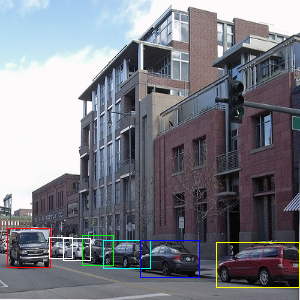

In [39]:
include("visualizations.jl")
drawDetectedBoundingBox(4, x, all_images_boxes, all_images_labels, all_images_scores  )
    

In [ ]:
nice_colors

#Overfit on single example
for i in 1:10000
    J = @diff ssd300(x,bounding_boxes,labels)
    for par in params(ssd300)
        g = grad(J, par)
        Knet.update!(Knet.value(par), g, par.opt)
    end
    
   # momentum!(ssd300,[(x,bounding_boxes,labels)],lr = 1e-3, gamma=0.9)
end

In [ ]:
iterations = 120000
datasets = [trainval_VOC2007_dataset]

total_num_batch = 0
for data in datasets
    total_num_batch += length(data)
end
    
epochs = floor(iterations/ total_num_batch)


for (x,bounding_boxes,labels) in train_dataset
    #sgd!(ssd300,[(x,bounding_boxes,labels)],lr = 1e-3)
    println(siz(x))
end
    

for (x,bounding_boxes,labels) in train_dataset
    println(typeof(x))
    ssd300(x,bounding_boxes,labels)
    break
end

iterations = 120000  # number of iterations to train
#workers = 4  # number of workers for loading data in the DataLoader
#print_freq = 200  # print training status every __ batches
lr = 1e-3  # learning rate
decay_lr_at = [80000, 100000]  # decay learning rate after these many iterations
decay_lr_to = 0.1  # decay learning rate to this fraction of the existing learning rate
momentum = 0.9  # momentum
weight_decay = 5e-4  # weight decay
epochs = iterations / (length(train_dataset) / 32)
decay_lr_at = [it / (length(train_dataset) / 32) for it in decay_lr_at]
decay_lr_at = floor.(decay_lr_at)

function writeToLogFile(filename , yazi)
    open("/kuacc/users/ckoksal20/log_files/$filename", "a") do f
    write(f, "$yazi\n")
    end
end
     

In [ ]:
epochs

In [ ]:
function mytrain!(model::SSD300, train_datasets, test_data::PascalVOC,
                  period::Int=2000, iters::Int=50000;learning_rate = 1e-3 , learning_rate_decay = 0.1 )
    
    train_loss = []
    test_loss = []
    iteration = 0
    curTime = currentTime()
    tr_loss = 0
    tst_loss = 0
    
    filename="log_ssd300_2012_VOC2007trainval_smoot_l1_batch_$batch_size-iteration_$iterations-$curTime.txt"
    for epoch in 1:epochs
        start_epoch_time = now()
        for train_data in train_datasets
            for (x,bounding_boxes,labels) in train_data
                if iteration == 80000|| (iteration > 80000 && iteration % 20000 == 0)
                    
                    lrdecay!(model,learning_rate_decay)
                    
                    println("Learning_rate decay is applied")
                    open("/kuacc/users/ckoksal20/log_files/$filename", "a") do f
                        write(f, "Learning rate changed to $learning_rate epoch $epoch ")

                    end
                    curTime = currentTime()
                    Knet.save("/kuacc/users/ckoksal20/trained_models/model_ssd30_smoot_l1_VOC2007trainval_cur_iteration-$iteration-$curTime.jld2","model_$iteration",model)

                end

                if iteration%period == 0
                    tr_loss = 0
                    for train_data in train_datasets
                        tr_loss+= model(train_data) 
                    end
                    tr_loss = tr_loss/ length(train_datasets)
                        
                    tst_loss = model(test_data)
                    println("Iteration", iteration, "training loss : ",tr_loss, "test_loss : ",tst_loss)
                    open("/kuacc/users/ckoksal20/log_files/$filename", "a") do f
                        write(f, "Iteration: $iteration, training loss $tr_loss, test_loss $tst_loss \n")
                    end
                    append!(train_loss,tr_loss )
                    append!(test_loss,tst_loss )
                end
                sgd!(ssd300,[(x,bounding_boxes,labels)],lr = learning_rate)
                iteration +=1
            end
        end
    end_epoch_time = now()
    elapsed_time = ((end_epoch_time -start_epoch_time).value)/1000/60
        
    println("Elapsed time $elapsed_time min epoch : $epoch\n")    
    open("/kuacc/users/ckoksal20/log_files/$filename", "a") do f
        write(f, "Elapsed time $elapsed_time min epoch : $epoch\n")
        write(f,"Iteration: $iteration, training loss : $tr_loss, test_loss : $tst_loss \n")
    
        end
    end
        
    return 0:period:iteration, train_loss, test_loss
end



In [ ]:
iters, trnloss, tstloss = mytrain!(ssd300,datasets,test_VOC2007_dateset;learning_rate = 1e-3 )

In [ ]:
#iters_2, trnloss_2, tstloss_2 = mytrain!(ssd300,train_dataset,validation_dataset;learning_rate = 1e-3 )

In [ ]:
#length(validation_dataset)

In [ ]:
import Pkg; Pkg.add("Plots")


In [ ]:
tstloss_c = copy(tstloss)

In [ ]:
trnloss_c = copy(trnloss)

In [ ]:
trnloss_c = trnloss_c ./(length(train_dataset))

In [ ]:
tstloss_c = tstloss_c ./ (length(validation_dataset))

In [ ]:
using Plots; default(fmt=:png,ls=:auto)
plot(iters, trnloss_c, label="train", xlabel="iterations", ylabel="loss")
plot!(iters, tstloss_c, label="test")

In [ ]:
using Plots; default(fmt=:png,ls=:auto)
plot(iters, trnloss, label="train", xlabel="iterations", ylabel="loss")
plot!(iters, tstloss, label="test")

In [ ]:
iteration = 5


In [ ]:
if iteration == 5 || iteration == 10000
    print("yey")
end